## Libraries

In [0]:
# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import urllib.request, json 

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Import Dataframes

### Link with Google Drive

In [0]:
#in order to read a csv file from your drive, you need to establish the link between your drive and colab
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Import Coordinates of apartments

In [0]:
#Then, You can read your csv
import pandas as pd 
data_apartment =pd.read_csv('gdrive/My Drive/scraping_apartments.csv')
data_apartment.head()

,ID,Neighborhood,Latitude,Longitude,Price,Rooms,Space,Kitchen,url
0,110429907,Barmen,51.26317,7.19012,331.0,2.0,48.0,True,https://www.immobilienscout24.de/expose/110429907
1,110986178,Vohwinkel,51.23279,7.08696,430.0,2.0,48.0,True,https://www.immobilienscout24.de/expose/110986178
2,110640456,Oberbarmen,51.27677,7.20847,494.0,3.0,95.0,True,https://www.immobilienscout24.de/expose/110640456
3,110624390,Elberfeld,51.24868,7.14997,180.0,1.0,22.0,True,https://www.immobilienscout24.de/expose/110624390
4,110954479,Barmen,51.26352,7.19017,346.0,2.0,55.0,True,https://www.immobilienscout24.de/expose/110954479


In [0]:
#Order the dataframe by price
data_apartment = data_apartment.sort_values(by=['Price'])
data_apartment.head()

,ID,Neighborhood,Latitude,Longitude,Price,Rooms,Space,Kitchen,url
78,40457817,Cronenberg,51.22417,7.15206,120.17,1.0,22.42,True,https://www.immobilienscout24.de/expose/40457817
79,30826857,Cronenberg,51.21651,7.15112,145.77,1.0,24.88,True,https://www.immobilienscout24.de/expose/30826857
32,110808871,Cronenberg,51.20981,7.14170,150.00,1.0,35.00,True,https://www.immobilienscout24.de/expose/110808871
3,110624390,Elberfeld,51.24868,7.14997,180.00,1.0,22.00,True,https://www.immobilienscout24.de/expose/110624390
15,104939187,Elberfeld West,51.24558,7.13021,190.00,1.0,27.00,True,https://www.immobilienscout24.de/expose/104939187


### Import top 10 venues per Neighborhood

In [0]:
#Then, You can read your csv
import pandas as pd 
wuppertal_merged =pd.read_csv('gdrive/My Drive/wuppertal_merged.csv')
wuppertal_merged

,Unnamed: 0,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Barmen,51.267846,7.184963,2,Supermarket,Fast Food Restaurant,Café,Cable Car,Plaza,Market,Opera House,Discount Store,Music Venue,Drugstore
1,1,Cronenberg,51.205583,7.142629,2,Bus Stop,Gas Station,Drugstore,Plaza,Italian Restaurant,Food & Drink Shop,Furniture / Home Store,Electronics Store,Event Space,Falafel Restaurant
2,2,Elberfeld,51.246547,7.147850,2,Café,Hotel,Supermarket,Italian Restaurant,Clothing Store,Bar,Drugstore,Coffee Shop,Ice Cream Shop,Fast Food Restaurant
3,3,Elberfeld West,51.248559,7.109591,2,Supermarket,Hotel,Zoo,Sandwich Place,Pizza Place,Cocktail Bar,Intersection,Cable Car,Racetrack,Light Rail Station
4,4,Heckinghausen,51.260607,7.211397,2,Fast Food Restaurant,Café,Drugstore,Gym / Fitness Center,Bus Stop,Diner,Clothing Store,Cable Car,Opera House,German Restaurant
5,5,Langerfeld-Beyenburg,51.245742,7.267937,0,Antique Shop,Farmers Market,Camera Store,Furniture / Home Store,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop
6,6,Oberbarmen,51.292888,7.231723,3,Historic Site,Photography Studio,Supermarket,Rest Area,Food & Drink Shop,Discount Store,Drugstore,Electronics Store,Event Space,Falafel Restaurant
7,7,Ronsdorf,51.229937,7.205519,2,Supermarket,Fast Food Restaurant,Drugstore,Pizza Place,IT Services,Ice Cream Shop,Plaza,Gas Station,Bus Stop,Light Rail Station
8,8,Uellendahl-Katernberg,51.284183,7.133142,1,Business Service,Bakery,Park,Pharmacy,Grocery Store,Fast Food Restaurant,Diner,Discount Store,Drugstore,Electronics Store
9,9,Vohwinkel,51.235858,7.066885,2,Supermarket,Gym / Fitness Center,Café,Hotel,Bakery,Event Space,Gas Station,Cable Car,Electronics Store,Falafel Restaurant


### Import Coordinates of Station

In [0]:
#Then, You can read your csv
import pandas as pd 
station_data =pd.read_csv('gdrive/My Drive/scraping_station.csv')
station_data

,Unnamed: 0,StationName,StationLatitude,StationLongitude
0,0,Kluse/Schauspielhaus,51.255702,7.154495
1,1,Hauptbahnhof,51.255922,7.148439
2,2,Alter Markt,51.269498,7.198256
3,3,Adlerbrücke,51.267067,7.189036
4,4,Loher Brücke,51.267185,7.181358
5,5,Völklinger Straße,51.262489,7.174084
6,6,Werther Brücke,51.272305,7.206666
7,7,Landgericht,51.258033,7.162409
8,8,Ohligsmühle,51.255336,7.142529
9,9,Robert-Daum-Platz,51.252380,7.134319


## Statistics Analysis

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


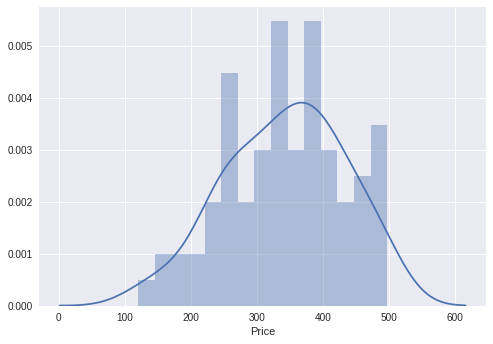

In [0]:
#Study the distribution of apartments
import seaborn as sns
sns.distplot(data_apartment['Price'],bins=15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


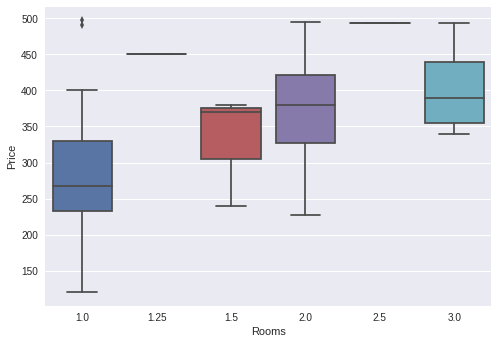

In [0]:
#Plot the price apartments and the number of rooms to analyze the corelation
sns.boxplot(x='Rooms', y= 'Price', data=data_apartment)

## Mapping Data

### Mapping the apartments to rent

In [0]:
# create a map of Wuppertal using latitude and longitude values from Nominatim
latitude= 51.264018
longitude= 7.1780374
#We took these coordinates of Wuppertal from another notebook (data_apartment). 

map_wuppertal_rent = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(data_apartment['Latitude'], data_apartment['Longitude'],'$ ' + data_apartment['Price'].astype(str)):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wuppertal_rent) 
    

map_wuppertal_rent

### Mapping Apartments and Venues of Neighborhood

In [0]:
# create map of Wuppertal using latitude and longitude values from Nominatim
latitude= 51.264018
longitude= 7.1780374


# create map with clusters
kclusters=4
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wuppertal_merged['Latitude'], wuppertal_merged['Longitude'], wuppertal_merged['Neighborhood'], wuppertal_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(data_apartment['Latitude'], data_apartment['Longitude'],'$ ' + data_apartment['Price'].astype(str)):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_wuppertal_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_wuppertal_rent)

map_clusters2

### The final Map includes: apartments, subway station and Venues

In [0]:
# create map of Wuppertal using latitude and longitude values from Nominatim
latitude= 51.264018
longitude= 7.1780374

map_wu_one = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(data_apartment['Latitude'], data_apartment['Longitude'], data_apartment['url'].astype(str)):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wu_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(station_data['StationLatitude'], station_data['StationLongitude'],  station_data['StationName'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_wu_one) 


# set color scheme for the clusters
kclusters=4
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add a circle around the job's station to the map
folium.Marker([51.2523799203, 7.1343191626]).add_to(map_wu_one)
folium.Circle([51.2523799203, 7.1343191626],
                    radius=1500
                   ).add_to(map_wu_one)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wuppertal_merged['Latitude'], wuppertal_merged['Longitude'], wuppertal_merged['Neighborhood'], wuppertal_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_wu_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_wu_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_wu_one)

map_wu_one

## Selecting Apartments

### Conditions

In this project, we are looking for an apartment in Wuppertal (Germany) with these conditions:
-	Apartment with at least 1 bedroom
-	Kitchen included
-	Rent not to exceed 500€/month

### So?

After examining the final map, I have chosen these 3 apartments 

In [0]:
# create map of Wuppertal using latitude and longitude values from Nominatim
latitude= 51.2523799203
longitude= 7.1343191626

map_wu_one = folium.Map(location=[latitude, longitude], zoom_start=14.4)

# add markers to map
for lat, lng, label in zip(data_apartment['Latitude'], data_apartment['Longitude'], data_apartment['url'].astype(str)):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wu_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(station_data['StationLatitude'], station_data['StationLongitude'],  station_data['StationName'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_wu_one) 


# set color scheme for the clusters
kclusters=4
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add a circle around the job's station to the map
folium.Marker([51.2523799203, 7.1343191626]).add_to(map_wu_one)
folium.Circle([51.2523799203, 7.1343191626],
                    radius=1500
                   ).add_to(map_wu_one)

# add a markers of 3 selected apartments
#id 110938412
folium.Marker([51.25203, 7.15339]).add_to(map_wu_one)

#id 110302706
folium.Marker([51.26044, 7.14711]).add_to(map_wu_one)

#id 76755982
folium.Marker([51.26047, 7.14126]).add_to(map_wu_one)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wuppertal_merged['Latitude'], wuppertal_merged['Longitude'], wuppertal_merged['Neighborhood'], wuppertal_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_wu_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_wu_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_wu_one)

map_wu_one

### Venues for the 3 apartments are in the same cluster 2

In [0]:
## kk is the cluster number to explore
kk = 2
wuppertal_merged.loc[wuppertal_merged['Cluster Labels'] == kk, wuppertal_merged.columns[[1] + list(range(5, wuppertal_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barmen,Supermarket,Fast Food Restaurant,Café,Cable Car,Plaza,Market,Opera House,Discount Store,Music Venue,Drugstore
1,Cronenberg,Bus Stop,Gas Station,Drugstore,Plaza,Italian Restaurant,Food & Drink Shop,Furniture / Home Store,Electronics Store,Event Space,Falafel Restaurant
2,Elberfeld,Café,Hotel,Supermarket,Italian Restaurant,Clothing Store,Bar,Drugstore,Coffee Shop,Ice Cream Shop,Fast Food Restaurant
3,Elberfeld West,Supermarket,Hotel,Zoo,Sandwich Place,Pizza Place,Cocktail Bar,Intersection,Cable Car,Racetrack,Light Rail Station
4,Heckinghausen,Fast Food Restaurant,Café,Drugstore,Gym / Fitness Center,Bus Stop,Diner,Clothing Store,Cable Car,Opera House,German Restaurant
7,Ronsdorf,Supermarket,Fast Food Restaurant,Drugstore,Pizza Place,IT Services,Ice Cream Shop,Plaza,Gas Station,Bus Stop,Light Rail Station
9,Vohwinkel,Supermarket,Gym / Fitness Center,Café,Hotel,Bakery,Event Space,Gas Station,Cable Car,Electronics Store,Falafel Restaurant


## Final Selection

In [0]:
#Analyzing apartments
df_apartment_selection = data_apartment[data_apartment['ID'].isin(['76755982','110302706','110938412'])]
df_apartment_selection.head()

,ID,Neighborhood,Latitude,Longitude,Price,Rooms,Space,Kitchen,url
23,110938412,Elberfeld,51.25203,7.15339,310.0,2.0,46.0,True,https://www.immobilienscout24.de/expose/110938412
73,76755982,Elberfeld,51.26047,7.14126,329.0,1.0,31.0,True,https://www.immobilienscout24.de/expose/76755982
49,110302706,Elberfeld,51.26044,7.14711,420.0,2.0,54.0,True,https://www.immobilienscout24.de/expose/110302706


Based on data analysis, I feel that Cluster 2 type of venues is great place to live. However, the apartment at 420€/month seems to be a better choice since the extra monthly rent is worth the conveniences. In fact, it's close to my work. Furthermore, the apartment is bigger than the others which can be a good solution. In fact, I can rent the 2nd room. 